In [29]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [30]:
# data = pd.read_csv(r'C:\Users\91707\Desktop\water_quality_prediction\dataset.csv')
data = pd.read_csv(r'C:\Users\91707\Desktop\water_quality_prediction\sampled_data.csv')

In [31]:

#         # reducing the sample size 

# sample_size = 10000

#         # Randomly sample a subset of the data
# sampled_df = data.sample(n=sample_size, random_state=42)

#         # Save the sampled data to a new CSV file
# sampled_df.to_csv('sampled_data.csv', index=False)

In [32]:
# data
data.shape

(10000, 24)

Data cleaning

Dimensionality Reduction

In [33]:

# data.info()
# print(data.columns)
data = data.drop(columns=['Index','Color','Water Temperature','Air Temperature','Source','Month','Day','Time of Day'])



In [34]:
# fill the missing values

# Replace null or NaN values with column mean
data.fillna(data.mean(),inplace=True)

# data.isnull().sum()

data



,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Target
0,6.865081,0.002090,6.665196,154.304661,2.532523e-08,2.100854,0.006723,1.901142,1.263176,1.040840,166.285918,190.085908,2.726099,8.760657e-07,84.907959,1
1,8.218379,0.018253,7.960071,146.568255,9.387020e-08,1.566728,0.103921,1.373210,0.189954,0.721160,74.803539,249.638471,3.912876,3.314244e-02,403.844600,0
2,8.222025,0.020773,7.661815,233.560403,1.685993e-45,0.347338,0.000054,1.536736,0.478412,0.964127,148.245938,427.615607,2.647662,2.931158e-07,252.332438,0
3,7.614713,0.000039,4.735283,199.783328,1.200594e-56,0.379548,0.445300,0.816121,0.321648,1.033522,146.904418,262.959440,2.667591,1.685162e-03,209.074768,0
4,8.469935,0.000005,3.459419,178.919805,1.382519e-89,0.255855,1.016629,0.514603,0.226024,0.827003,107.101669,120.771386,2.091191,1.060475e-14,493.565135,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6.980011,0.032949,11.002056,126.971208,2.828189e-51,0.048896,4.187026,0.942013,1.930687,4.123265,174.166342,284.426342,2.358868,1.847975e-05,121.845368,1
9996,8.485674,0.234151,4.996311,151.212345,1.748252e-198,3.947420,0.103342,0.980125,0.752417,1.389119,83.254819,100.489391,3.871977,9.535308e-03,22.841322,0
9997,7.919120,0.091026,5.998148,186.576932,1.534790e-40,0.574512,0.021974,0.966095,0.053412,1.210594,141.257223,295.291734,2.995800,5.764343e-04,133.319921,0
9998,8.358430,0.265897,9.742094,243.560265,1.241578e-02,3.240438,0.351515,1.423338,0.385249,2.032930,54.716859,193.021023,2.902601,2.225997e-10,529.378100,0


checking if we need to do dimensionality reduction

In [35]:
# sns.heatmap(data.corr(),annot=True,cmap='terrain')
# fig = plt.gcf()
# fig.set_size_inches(25,10)
# plt.show()

Box outliner

In [36]:
# data.boxplot(figsize=(25,10))
# plt.show()

In [37]:
# checking data is biased or not

# data
data['Target'].value_counts()

Target
0    6923
1    3077
Name: count, dtype: int64

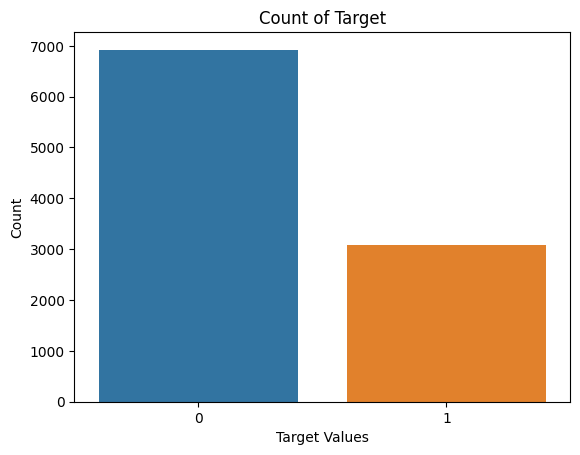

In [38]:
sns.countplot(data=data, x='Target')

# Set plot title and labels
plt.title('Count of Target')
plt.xlabel('Target Values')
plt.ylabel('Count')

# Display the plot
plt.show()

In [39]:
# checking normality

# data.hist(figsize=(10,10))
# plt.show()

In [40]:
# sns.barplot(x=data['pH'],y = data['Chloride'],hue = data['Target'])
# plt.show()

Normalisation

partioning

In [41]:
X = data.drop('Target',axis=1)
Y = data['Target']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=23)

normalization

In [44]:
scaler = MinMaxScaler()

scaler.fit(X_train)

# transform train and test data

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

np.round(X_train.describe(),1)


,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids
count,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0
mean,7.5,0.1,6.2,185.2,0.0,1.6,0.5,1.0,0.5,1.8,147.2,427.6,3.3,0.1,268.7
std,0.9,0.5,3.2,66.1,0.0,1.5,1.0,0.8,0.6,1.1,67.0,189.0,0.7,0.5,156.2
min,3.0,0.0,0.8,42.9,0.0,0.0,0.0,0.0,0.0,0.0,13.4,33.2,1.4,0.0,0.1
25%,6.9,0.0,4.1,140.4,0.0,0.4,0.0,0.4,0.1,0.9,100.8,291.1,2.8,0.0,133.8
50%,7.5,0.0,5.7,178.7,0.0,1.1,0.2,0.8,0.4,1.8,137.8,406.5,3.2,0.0,270.1
75%,8.0,0.1,7.7,217.8,0.0,2.2,0.6,1.3,0.7,2.6,181.7,527.6,3.7,0.0,399.8
max,12.1,8.5,39.7,727.8,2.9,13.5,12.6,7.4,6.7,4.1,708.7,1459.6,8.8,13.8,579.8


Model training

decision tree

In [46]:
from sklearn.tree import DecisionTreeClassifier


# Create an instance of DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = clf.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 81.3


In [48]:
print(Y_test)

6326    0
5185    0
2495    1
2765    1
9303    0
       ..
5640    1
8667    0
6027    0
8662    1
9764    1
Name: Target, Length: 2000, dtype: int64


In [49]:
cm = confusion_matrix(Y_test, Y_pred)

print("Confusion matrix")
print(cm)

Confusion matrix
[[1208  178]
 [ 196  418]]


In [50]:
print(Y_test.to_list())

[0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 

In [51]:
output=clf.predict(X_test)

print(output)

[0 0 0 ... 0 1 0]
